# Python instructie bij Dictaat Hoofdstuk 3
Onderstaande Python instructies en voorbeelden horen bij Hoofdstuk 3: Lineair programmeren, TB135C - Besliskunde.

## <b>2. Formuleren van een lineair programmeringsprobleem</b>    
De module <a href = http://benalexkeen.com/linear-programming-with-python-and-pulp-part-2/>PuLP</a> kan worden gebruikt om lineaire programmeringsproblemen te formuleren in Python op een manier die overeenkomt met hoe we op papier een LP probleem formuleren.     
Pulp is niet standaard geinstalleerd in Anaconda. Voer daartoe de volgende handelingen uit:
Voor Windows:
<ul>
<li>Anaconda Prompt te openen (bij je program files) </li>
<li>In te typen:  pip install pulp </li>
</ul>

Voor Mac:
<ul>
<li>Jupyter Notebook op de gebruikelijke manier te openen in je browser </li>
<li>Rechtsboven op NEW te klikken </li>
<li>Onderin de keuzelijst terminal te kiezen</li>
<li>In te typen: pip install pulp</li>
</ul>

Daarna kan een externe solver worden aangeroepen om het probleem op te lossen. 
We importeren de module PuLP met <i>from pulp import *</i>. Op deze manier kunnen we direct de procedures uit de module gebruiken zonder er eerst <i>pulp.</i> voor te hoeven zetten. Bijvoorbeeld <i>LpProblem</i> i.p.v. <i>pulp.LpProblem</i>.      

In [1]:
#Importeer de module PuLP
from pulp import *

Allereerst definieren we het LP probleem m.b.v. <a href=https://www.coin-or.org/PuLP/pulp.html>LpProblem</a>. Hierin geven we het LP probleem een naam en vertellen we of het een maximalisatie- of minimalisatieprobleem betreft.

In [2]:
# Definieer het LP probleem 'Praag' als maximalisatieprobleem
probleem = LpProblem('Praag', LpMaximize)

Daarna definiëren we de beslissingsvariabelen van het probleem m.b.v. <a href=https://www.coin-or.org/PuLP/pulp.html?highlight=lpvariable#pulp.LpVariable>LpVariable</a>.       
Je kan iedere beslissingsvariabele een naam geven en aangeven of er een ondergrens (<i>lowBound</i>) of bovengrens (<i>upBound</i>) is voor de waarden die de variabele kan aannemen. Ook kan je hier, als het nodig is, aangeven dat de variabele alleen gehele (<i>cat = 'Integer'</i>) of binaire (<i>cat = 'Binary'</i>) waarden aan kan nemen. Als je niets invult, wordt ervan uitgegaan dat het een continue variabele betreft. 

In [3]:
# Definieer de beslissingsvariabelen met ondergrens 0
W = LpVariable('winkelen', lowBound=0)
M = LpVariable('museum', lowBound=0)

Als de beslissingsvariabelen zijn gedefinieerd, voegen we allereerst de doelfunctie toe aan het probleem. We kunnen hiervoor gewoon += gebruiken, zoals eerder ook bij variabelen en lijsten. 

In [4]:
#Voeg de doelfunctie toe aan het probleem
probleem += 4*W + 3*M

Daarna voegen we één voor één de beperkingen toe op dezelfe manier als we de doelfunctie toe hebben gevoegd.

In [5]:
#Voeg de beperking voor de totaal beschikbare tijd toe aan het probleem
probleem += (W + M <= 8)

#Voeg de beperking voor de verplichting thuis toe aan het probleem
probleem += (W <= M + 2)

#Voeg de beperking voor de openingstijd museum toe aan het probleem
probleem += (M <= 6)

Door het probleem te laten printen kunnen we controleren of we het probleem correct hebben geformuleerd. 

In [6]:
#Print het totale probleem
print(probleem)

Praag:
MAXIMIZE
3*museum + 4*winkelen + 0
SUBJECT TO
_C1: museum + winkelen <= 8

_C2: - museum + winkelen <= 2

_C3: museum <= 6

VARIABLES
museum Continuous
winkelen Continuous



Als we het probleem goed gedefinieerd hebben, kunnen we het nu laten oplossen. We gebruiken hiervoor <i>.solve()</i>. Hiermee wordt automatisch de juiste solver aangeroepen.     
Met LpStatus kunnen we meteen controleren of het optimum inderdaad wordt gevonden. In het geval van een onbegrensd probleem, krijgen we hiermee de melding "Unbounded". En bij een onoplosbaar probleem, krijg we de melding "Infeasible". 

In [7]:
# Los het LP probleem op
probleem.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[probleem.status])

Status: Optimal


Nu kunnen we de resultaten laten printen door de waarden van van de beslissingsvariabelen opgeslagen in <i>probleem.variables()</i> op te vragen met <i>value()</i> en de waarde van de doelfunctie opgeslagen in <i>probleem.objective</i>. 

In [8]:
# De waarden van de beslissingsvariabelen in het optimum
for var in probleem.variables():
    print('Aan', var,'moet je', value(var), 'uur besteden')
    
# De waarde van de doelfunctie in het optimum
print('Je totale plezier is dan', value(probleem.objective))

Aan museum moet je 3.0 uur besteden
Aan winkelen moet je 5.0 uur besteden
Je totale plezier is dan 29.0


We kunnen ook achterhalen welke beperkingen actief zijn in dit optimum door de waarden (<i>beperking.slack</i>) van de spelingsvariabelen in het optimum op te vragen. We doorlopen daarvoor alle beperkingen, opgeslagen in de lijst <i>probleem.constraints.items()</i>. NB. Iedere beperking is opgeslagen onder zijn gecodeerde naam (_C1,_C2, etc.) en de uitgeschreven beperking. 

In [9]:
for naam, beperking in probleem.constraints.items():
    print('Beperking',naam,':', beperking, 'heeft waarde', beperking.slack, 'in optimum')

Beperking _C1 : museum + winkelen <= 8 heeft waarde -0.0 in optimum
Beperking _C2 : -museum + winkelen <= 2 heeft waarde -0.0 in optimum
Beperking _C3 : museum <= 6 heeft waarde 3.0 in optimum


De beperking C1 en C2 zijn actief in het optimum, want de bijbehorende spelingsvariabelen hebben een waarde gelijk aan 0.   
     
## <b>6. Schaduwprijzen</b>     
Bij het uitvoeren van de optimalisatie worden ook automatisch de schaduwprijzen berekend. Ook deze kunnen voor iedere beperking worden opgeroepen m.b.v. <i>beperking.pi</i>.

In [10]:
for naam, beperking in probleem.constraints.items():
    print('Beperking',naam,':', beperking, 'heeft een schaduwprijs van', beperking.pi)

Beperking _C1 : museum + winkelen <= 8 heeft een schaduwprijs van 3.5
Beperking _C2 : -museum + winkelen <= 2 heeft een schaduwprijs van 0.5
Beperking _C3 : museum <= 6 heeft een schaduwprijs van -0.0


Hieruit leren we dat voor ieder uur dat we extra zouden kunnen doorbrengen in Praag, we 3.5 punt meer plezier zouden kunnen hebben.    
Daarnaast zouden we voor ieder uur extra toegestaan verschil tussen museumbezoek en winkelen een 0.5 punt meer plezier kunnen hebben.   
De laatste beperking was niet actief in het optimum en geeft dus ook geen extra plezier als deze opgerekt wordt. 

### <b>6.1 Experimenteren</b>     
In veel situaties zou je willen weten wat er zou gebeuren als er veranderingen optreden.
Je kan de coëfficiënten en de constanten in het LP probleem eenvoudig wijzigen.     
De coëfficiënt van M in de beperking M + W <= 8 is gelijk aan 1. Deze kan je opvragen m.b.v.

In [11]:
probleem.constraints['_C1'][M]

1

En op deze manier kan je deze coëfficiënt ook een nieuwe waarde geven:

In [12]:
probleem.constraints['_C1'][M] = 3
print(probleem.constraints['_C1'])

3*museum + winkelen <= 8


Ook de constante kan je opvragen en wijzigen. Echter wordt deze wel gegeven zoals hij aan de linkerkant van de ongelijkheid zou staan. Dus als je hem wilt wijzigen moet je daar rekening mee houden.

In [13]:
print(probleem.constraints['_C1'].constant)

-8


Stel dat we de constante in deze beperking willen wijzigen naar 5 uur bijvoorbeeld.

In [14]:
probleem.constraints['_C1'].constant = -5
print(probleem.constraints['_C1'])

3*museum + winkelen <= 5


Op dezelfde manier kan je ook de coëfficiënten in de doelfunctie wijzigen:

In [15]:
probleem.objective[M] = 2
print(probleem.objective)

2*museum + 4*winkelen


Je moet nu natuurlijk wel het probleem opnieuw oplossen om de optimale oplossing van het nieuwe probleem te bepalen

# 7. Grafentheorie en Lineaire optimalisatie

## <b>7.1. Het maximale-stroom-algoritme als LP probleem</b>     
We kunnen het maximale stroom probleem ook formuleren als een LP probleem. We zullen dit illustreren aan de hand van het voorbeeld in het dictaat.

Allereerst definiëren we het probleem: 

In [16]:
#Definieer het LP probleem 'Stroom' als maximalisatieprobleem
maxflow = LpProblem('Stroom', LpMaximize)

We moeten ook alle beslissingsvariabelen definiëren met ondergrens 0 en bovengrens gelijk aan de capaciteit van de bijbehorende tak. 

In [17]:
# Definieer de beslissingsvariabelen
S12 = LpVariable('S12', lowBound=0, upBound=5)
S13 = LpVariable('S13', lowBound=0, upBound=10)
S32 = LpVariable('S32', lowBound=0, upBound=15)
S34 = LpVariable('S34', lowBound=0, upBound=5)
S24 = LpVariable('S24', lowBound=0, upBound=10)

De doelfunctie bestaat uit het maximaliseren van de stroom die de put instroomt.

In [18]:
#Voeg de doelfunctie toe aan het probleem
maxflow += S34 + S24

Daarnaast zijn er nog twee extra beperkingen voor de doorvoerknopen 2 en 3.    
NB. Het betreft hier vergelijkingen waarbij de linkerkant identiek aan de rechterkant moet zijn. Hiervoor wordt == gebruikt, niet =.

In [19]:
#Voeg de beperkingen toe aan het probleem
maxflow += (S12+S32-S24 == 0)
maxflow += (S13-S32-S34 == 0)

Nu kunnen we het probleem printen om te controleren of alles correct is.

In [20]:
#Print het totale probleem
print(maxflow)

Stroom:
MAXIMIZE
1*S24 + 1*S34 + 0
SUBJECT TO
_C1: S12 - S24 + S32 = 0

_C2: S13 - S32 - S34 = 0

VARIABLES
S12 <= 5 Continuous
S13 <= 10 Continuous
S24 <= 10 Continuous
S32 <= 15 Continuous
S34 <= 5 Continuous



Als alles correct is geformuleerd, kunnen we het probleem oplossen:

In [21]:
# Los het LP probleem op
maxflow.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[maxflow.status])

Status: Optimal


En de resultaten printen:

In [22]:
# De waarden van de beslissingsvariabelen in het optimum
for var in maxflow.variables():
    print('De stroom', var,'bedraagt', value(var))
    
# De waarde van de doelfunctie in het optimum
print('De totale maximale stroom bedraagt', value(maxflow.objective))

De stroom S12 bedraagt 5.0
De stroom S13 bedraagt 10.0
De stroom S24 bedraagt 10.0
De stroom S32 bedraagt 5.0
De stroom S34 bedraagt 5.0
De totale maximale stroom bedraagt 15.0


# <b>[EXTRA] Dus geen tentamenstof</b>     
De onderstaande problemen die we eerder hebben opgelost met algoritmen uit de grafentheorie kunnen we, net als het maximale-stroom-probleem, ook formuleren en oplossen als LP problemen. Bij deze problemen spelen echter vaak veel belissingsvariabelen en beperkingen een rol, waardoor het onhandig is om deze één voor één te moeten formuleren. We kunnen daarbij dus beter gebruik maken van lussen en lijsten. In onderstaande uitleg wordt beschreven hoe je dit het beste kunt doen. Dit is echter geen tentamenstof. 

## <b>7.2 Het toewijzingsprobleem als LP-probleem [EXTRA] </b>    
In het dictaat hebben we gezien hoe we het toewijzingsprobleem kunnen definieren als een binair lineair programmeringsprobleem. We zullen hier het probleem van het toewijzen van afstudeerprojecten aan studenten uitwerken.    
Allereerst definiëren we het probleem als een maximalisatieprobleem.

In [23]:
#Definieer het ILP probleem 'toewijzing' als maximalisatieprobleem
maxmatch = LpProblem('toewijzing',LpMaximize)

Daarna definiëren we voor iedere mogelijke toewijzing een binaire beslissingsvariabele. We maken daarbij gebruik van de verzameling takken die in Hoofdstuk 2.2. al gedefinieerd zijn.     
We hoeven nu niet voor iedere tak apart een beslissingsvariabele te definiëren maar kunnen m.b.v. het commando <i>LpVariable.dicts</i> dat in één keer doen voor de deze hele verzameling takken.

In [24]:
#De studenten
studenten = ['S1','S2','S3','S4','S5','S6','S7']
#De projecten
projecten = ['P1','P2','P3','P4','P5','P6','P7']
#De mogelijke verbindingen
takken = [('S1','P2'),('S1','P6'),('S2','P1'),('S2','P4'),('S2','P7'),
          ('S3','P5'),('S3','P6'),('S4','P2'),('S4','P5'),('S4','P6'),
          ('S5','P5'),('S6','P1'),('S6','P2'),('S6','P4'),('S6','P7'),
          ('S7','P3'),('S7','P7')]
#Definieer de beslissingsvariabelen
match = LpVariable.dicts("Match",takken,cat='Binary')

Dorodat de beslissingsvariabelen nu als een opzoektabel zijn gedefinieerd kunnen we ook de doelfunctie eenvoudig definiëren door gebruik te maken van <i>sum</i>. 

In [25]:
#Definieer de doelfunctie als som van alle beslissingsvariabelen
maxmatch += (sum([match[e] for e in takken]))

Voor iedere knoop geldt nu de beperking dat de knoop maar aan één andere knoop toegewezen mag worden. 

In [26]:
#Definieer deze beperking voor iedere student
for s in studenten:
    maxmatch += (sum([match[e[0],e[1]] for e in takken if s in e]) <= 1)

#Definieer deze beperking voor ieder project
for p in projecten:
    maxmatch += (sum([match[e[0],e[1]] for e in takken if p in e]) <= 1)

Als het probleem goed is gedefinieerd kunnen we het nu oplossen.

In [27]:
#Los het probleem op
maxmatch.solve()

# De waarden van de beslissingsvariabelen in het optimum
for var in maxmatch.variables():
    if value(var)==1:
        print(var)
    
# De waarde van de doelfunctie in het optimum
print('maximale toewijzing bedraagt', value(maxmatch.objective))

Match_('S1',_'P6')
Match_('S2',_'P4')
Match_('S4',_'P2')
Match_('S5',_'P5')
Match_('S6',_'P7')
Match_('S7',_'P3')
maximale toewijzing bedraagt 6.0


## <b>7.3 Het kortste-pad-probleem als LP-probleem [EXTRA]</b>    
In het dictaat hebben we gezien hoe we het kortste-pad-probleem kunnen definiëren als LP probleem. We zullen deze formulering nu gebruiken om het kortste pad te bepalen tussen knoop 0 en knoop 6 in het voorbeeld van Figuur 5.   

Allereerst definiëren we het probleem als een minimalisatieprobleem.

In [28]:
#Definieer het ILP probleem 'Kortste_Pad' als minimalisatieprobleem
minpad = LpProblem('Kortste_Pad', LpMinimize)

Daarna definiëren we voor iedere tak een binaire beslissingsvariabele.

In [29]:
#Alle takken in de graaf met de bijbehorende lengte
lengte_takken = [(0,1,40),(0,2,70),(0,3,10),(1,2,40),(1,4,50),(2,3,30),(2,4,30),(2,5,10),
                 (3,6,20),(4,5,30),(5,0,20),(6,2,30),(6,5,50)]

#Alle takken in de graaf zonder de bijbehorende lengte
takken = [(e[0],e[1]) for e in lengte_takken]

#Definieer alle binaire beslissingsvariabelen
X = LpVariable.dicts("tak",takken,cat='Binary')

De doelfunctie is de lengte van het totale pad. En deze moet geminimaliseerd worden. 

In [30]:
#Definieer de doelfunctie en voeg deze aan het probleem toe
minpad += (sum([e[2]*X[e[0],e[1]] for e in lengte_takken]))

De beperkingen zorgen ervoor dat de geslecteerde takken een aansluitend pad vormen. Voor iedere knoop moet een aparte beperking worden geformuleerd.   

In [31]:
#De startknoop
start = 0
#De eindknoop 
eind = 6

#Voor iedere knoop worden eerst de ingaande en uitgaande stromen opgeteld
#Voor alle knopen
for i in range(7):
#Alle uitgaande takken
    bep = sum(X[e[0],e[1]] for e in takken if i == e[0])
#Alle ingaande takken
    bep += -sum(X[e[0],e[1]] for e in takken if i == e[1])
    
#Als i de startknoop is
    if i == start:
#Beperking is gelijk aan 1
        minpad += (bep == 1)
#Als i de eindknoop is
    elif i == eind:
#Beperking is gelijk aan -1
        minpad += (bep == -1)
#Anders
    else:
#Beperking is gelijk aan 0
        minpad += (bep == 0)

Als alles goed is geformuleerd kunnen we het probleem oplossen

In [32]:
# Los het LP probleem op
minpad.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[minpad.status])

Status: Optimal


En de resultaten printen

In [33]:
# De waarden van de beslissingsvariabelen in het optimum
for var in minpad.variables():
    if value(var)==1:
        print('De', var,'zit in het pad')
    
# De waarde van de doelfunctie in het optimum
print('De totale lengte van het kortste pad bedraagt', value(minpad.objective))

De tak_(0,_3) zit in het pad
De tak_(3,_6) zit in het pad
De totale lengte van het kortste pad bedraagt 30.0


## De minimaal-opspannende-boom als LP-probleem [EXTRA]
Ook het probleem van het vinden van de minimaal opspannende boom hebben we in het dictaat geformuleerd als een binair lineair programmeringsprobleem. Zoals we hebben gezien kunnen het probleem op twee manieren formuleren:    
1. met binaire beslissingsvariabelen
2. met continue beslissingsvariabelen  
    
Beide methoden geven hetzelfde antwoord, zoals we hieronder zullen zien, maar voor de laatste methode kan het antwoord efficiënter worden gevonden omdat hiervoor de simplex methode kan worden gebruikt.     
We passen de methoden toe op dezelfde graaf als hierboven gebruikt voor het kortste pad.   

In [34]:
#Definieer het LP probleem 'min_boom' als minimalisatieprobleem
mob = LpProblem('min_boom',LpMinimize)

De takken zijn hierboven nog gedefinieerd.    
Hiermee kunnen we nu de beslissingsvariabelen als binaire variabelen definiëren, maar ook als continue variable. Door het # weg te halen kan je de ene of de andere definitie gebruiken.

In [35]:
#Definieer alle binaire beslissingsvariabelen
X = LpVariable.dicts("tak",takken,cat='Binary')

#Definieer alle continue belissingsvariabelen met ondergrens gelijk aan 0
#X = LpVariable.dicts("tak",takken,lowBound = 0)

De doelfunctie is precies dezelfde als die voor het kortste pad. 

In [36]:
#Definieer de doelfunctie en voeg deze aan het probleem toe
mob += (sum([e[2]*X[e[0],e[1]] for e in lengte_takken]))

De beperkingen zorgen ervoor dat de takken een opspannende boom vormen.

In [37]:
#Definieer het aantal knopen
n = 7
#Definieer de beperkingen dat er precies n-1 takken moeten zijn opgenomen in het netwerk
mob += (sum([X[e[0],e[1]] for e in takken]) == n-1)

#Voor de beperking m.b.t. de circuits gebruiken we het commando combinations
from itertools import combinations

#Voor alle mogelijk groottes k van de deelverzamelingen
for k in range(2,n): 
#Voor alle combinaties van k knopen
    for S in combinations(list(range(7)),k):
        mob += (sum([X[e[0],e[1]] for e in takken if (e[0] in S) and (e[1] in S)]) <=k-1)

Als het probleem goed is gedefinieerd, kunnen we het nu oplossen en de waarden van de beslisvariabelen bepalen en de totale lengte van de minimaal opspannende boom. 

In [38]:
# Los het LP probleem op
mob.solve()

# De waarden van de beslissingsvariabelen in het optimum
for var in mob.variables():
    if value(var)==1:
        print('De', var,'zit in het pad')
    
# De waarde van de doelfunctie in het optimum
print('De totale lengte van de minimaal opspannende boom bedraagt', value(mob.objective))

De tak_(0,_1) zit in het pad
De tak_(0,_3) zit in het pad
De tak_(2,_4) zit in het pad
De tak_(2,_5) zit in het pad
De tak_(3,_6) zit in het pad
De tak_(5,_0) zit in het pad
De totale lengte van de minimaal opspannende boom bedraagt 130.0


Je kunt het probleem op laten lossen voor beide varianten van de beslissingsvariabelen en je zult zien dat in beide gevallen dezelfde oplossing wordt gevonden.     
Het betreft hier slechts een klein probleem wat ook met de binaire variabelen snel wordt opgelost, maar voor grote problemen is de versie met continue variabelen significant sneller.

## <b>7.5. Het kleuringsprobleem als LP-probleem [EXTRA]</b>    
In het dictaat hebben we het kleuringsprobleem beschreven als een binair lineair programmingsprobleem. We zullen het voorbeeld over het kleuren van de provincies van Nederland nu gebruiken om dit probleem in Python op te lossen.   
We definiëren eerst het probleem.

In [39]:
#De provincies zijn in deze volgorde genummerd:
provincies = ['Zeeland','Zuid-Holland','Noord-Holland','Friesland','Groningen',
              'Drenthe','Overijssel','Gelderland','Limburg','Noord-Brabant',
              'Utrecht','Flevoland']

#Definieer het ILP probleem 'provincie_kleuring' als minimalisatieprobleem
minkleur = LpProblem('provincie_kleuring',LpMinimize)

Daarna definiëren we alle beslissingsvariabelen.

In [40]:
#Definieer n als het aantal provincies
n = 12
#Definieer de beslissingsvariabelen Yk voor de kleuren
Y = LpVariable.dicts('kleur',list(range(n)),cat = 'Binary')
#Definieer de beslissingsvariabelen Xik voor iedere combinatie provincie en kleur
X = LpVariable.dicts('combi',[(i,k) for i in range(n) for k in range(n)],cat = 'Binary')

De doelfunctie wordt nu gedefinieerd als het aantal toegewezen kleuren.

In [41]:
#Definieer de doelfunctie
minkleur += (sum([Y[k] for k in range(n)]))

Hierna kunnen de beperkingen worden toegevoegd.

In [42]:
#Definieer beperking dat iedere knoop precies één kleur moet krijgen
for i in range(n):
    minkleur += (sum([X[i,k] for k in range(n)]) == 1)
    
#Definieer beperking dat alleen gebruikte kleuren kunnen worden toegekend
for k in range(n):
    for i in range(n):
        minkleur += (X[i,k] <= Y[k])
        
#Definieer alle takken van de graaf (zie hoofdstuk 2.2)
takken = [(0,1),(0,9),(1,2),(1,7),(1,9),(1,10),(2,3),(2,10),(2,11),(3,4),
          (3,5),(3,6),(3,11),(4,5),(5,6),(6,7),(6,11),(7,8),(7,9),(7,10),
          (7,11),(8,9),(10,11)]

#Definieer beperking dat ieder paar naburige knopen niet dezelfde kleur mag hebben
for e in takken:
    for k in range(n):
        minkleur += (X[e[0],k]+X[e[1],k] <= 1)

Hierna kan het probleem opgelost worden.

In [43]:
#Los het probleem op
minkleur.solve()

# De waarden van de beslissingsvariabelen in het optimum
for i in range(n):
    for k in range(n):
        if value(X[i,k]) == 1.0:
            print(provincies[i],'krijgt kleur',k)
            
# Het totaal aantal gebruikte kleuren
print('Totaal aantal gebruikte kleuren:',value(minkleur.objective))

Zeeland krijgt kleur 6
Zuid-Holland krijgt kleur 0
Noord-Holland krijgt kleur 6
Friesland krijgt kleur 4
Groningen krijgt kleur 6
Drenthe krijgt kleur 0
Overijssel krijgt kleur 3
Gelderland krijgt kleur 6
Limburg krijgt kleur 0
Noord-Brabant krijgt kleur 4
Utrecht krijgt kleur 4
Flevoland krijgt kleur 0
Totaal aantal gebruikte kleuren: 4.0


## <b>7.6. Het handelsreizigersprobleem als LP-probleem [EXTRA]</b>    
In het dictaat hebben we gezien hoe we het handelsreizigersprobleem kunnen definiëren als ILP probleem. We zullen deze formulering nu gebruiken om het minimale Hamilton circuit te vinden voor het voorbeeld van Figuur 5.
Allereerst definiëren we het probleem:

In [44]:
#Definieer het ILP probleem 'handelsreiziger' als minimalisatieprobleem
mincircuit = LpProblem('handelsreiziger', LpMinimize)

Daarna definiëren we voor iedere tak een binaire beslissingsvariabele.

In [45]:
#Definieer de beslissingsvariabelen Xik voor iedere mogelijke tak
X = LpVariable.dicts('tak',[(i,j) for i in range(1,6) for j in range(i+1,6)],cat = 'Binary')

De doelfunctie is de totale schoonmaaktijd en deze moet geminimaliseerd worden.

In [46]:
#Definieer de opzoektabel met schoonmaaktijden per tak
tijd = {(1,2):4,(1,3):5,(1,4):5,(1,5):3,(2,3):3,(2,4):5,(2,5):2,(3,4):5,(3,5):4,(4,5):2}

#Definieer de doelfunctie en voeg deze aan het probleem toe
mincircuit += sum([tijd[(i,j)]*X[i,j] for i in range(1,6) for j in range(i+1,6)])

De beperkingen zorgen ervoor dat iedere knoop in het circuit is opgenomen en dat er geen deelcircuits ontstaan.     
Voor een probleem met n knopen is het aantal deelverzamelingen met k<n knopen gelijk aan n!/((n-k)!k!) (n over k). Het aantal beperkingen wordt hierdoor voor grote problemen dus erg groot. Daarom wordt dit probleem vaak in stappen opgelost. In de eerste stap worden deze beperkingen niet mee genemen. Als er dan een oplossing wordt gevonden met deelcircuits, dan wordt alleen die beperking opgenomen die deze oplossing uitsluit. En zo verder tot een oplossing wordt gevonden met één circuit dat alle knopen bevat.

In [47]:
#Definieer de beperkingen dat iedere knoop in het circuit moet zijn opgenomen
for v in range(1,6):
    mincircuit += (sum([X[i,j] for i in range(1,6) for j in range(i+1,6) if (v == i) or (v==j)]) ==2)

#Voor de beperking m.b.t. de deelcircuits gebruiken we het commando combinations
from itertools import combinations

#Definieer de beperkingen dat er geen deelcircuits ontstaan met 3 knopen
#Voor alle combinaties van 3 knopen
for S in combinations(list(range(1,6)),3):
    mincircuit += (sum([X[i,j] for i in range(1,6) for j in range(i+1,6) if ((i in S) and (j in S))]) <=2)

#Definieer de beperkingen dat er geen deelcircuits ontstaan met 3 knopen
#Voor alle combinaties van 4 knopen
for S in combinations(list(range(1,6)),4):    
    mincircuit += (sum([X[i,j] for i in range(1,6) for j in range(i+1,6) if ((i in S) and (j in S))]) <=3)


Als alles goed is gedefinieerd, kunnen we het probleem nu oplossen

In [48]:
# Los het LP probleem op
mincircuit.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[mincircuit.status])

Status: Optimal


In [49]:
# De waarden van de beslissingsvariabelen in het optimum
for var in mincircuit.variables():
    if value(var)==1:
        print('De', var,'zit in het pad')
    
# De waarde van de doelfunctie in het optimum
print('De totale lengte van minimale Hamilton circuit bedraagt', value(mincircuit.objective))

De tak_(1,_3) zit in het pad
De tak_(1,_4) zit in het pad
De tak_(2,_3) zit in het pad
De tak_(2,_5) zit in het pad
De tak_(4,_5) zit in het pad
De totale lengte van minimale Hamilton circuit bedraagt 17.0


# <b>8. Opdrachten</b>     
Bij een aantal opdrachten wordt gevraagd de oplossing te berekenen met Python. Daarvoor worden hier de uitwerkingen getoond. 

<b>Vraag 1k.</b>
Bepaal de oplossing van het probleem met Python.

In [50]:
#Definieer het LP probleem 'zender' als maximalisatieprobleem
zender = LpProblem('webzender', LpMaximize)

# Definieer de beslissingsvariabelen
K = LpVariable('klassiek', lowBound=0)
P = LpVariable('populair', lowBound=0)

#Voeg de doelfunctie toe aan het probleem
zender += 100*K + 300*P

#Voeg de beperkingen toe aan het probleem
zender += (K+P<=24) #Beperking aan tijd
zender += (-K+0.2*P <= 0) #Beperking door verhouding I
zender += (K-0.8*P <= 0) #Beperking door verhouding II
zender += (P<=15) #Beperking door auteursrechten

#Print het totale probleem
print(zender)

webzender:
MAXIMIZE
100*klassiek + 300*populair + 0
SUBJECT TO
_C1: klassiek + populair <= 24

_C2: - klassiek + 0.2 populair <= 0

_C3: klassiek - 0.8 populair <= 0

_C4: populair <= 15

VARIABLES
klassiek Continuous
populair Continuous



In [51]:
# Los het LP probleem op
zender.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[zender.status])

Status: Optimal


In [52]:
# De waarden van de beslissingsvariabelen in het optimum
for var in zender.variables():
    print('Het aantal uur', var,'bedraagt', value(var), 'per dag')
    
# De waarde van de doelfunctie in het optimum
print('De winst bedraagt', value(zender.objective), 'euro per dag')

Het aantal uur klassiek bedraagt 9.0 per dag
Het aantal uur populair bedraagt 15.0 per dag
De winst bedraagt 5400.0 euro per dag


In [53]:
#Bepaal de schaduwprijzen voor de beperkingen
for naam, beperking in zender.constraints.items():
    print('Beperking',naam,':', beperking, 'heeft een schaduwprijs van', beperking.pi, 'euro')

Beperking _C1 : klassiek + populair <= 24 heeft een schaduwprijs van 100.0 euro
Beperking _C2 : -klassiek + 0.2*populair <= -0.0 heeft een schaduwprijs van -0.0 euro
Beperking _C3 : klassiek - 0.8*populair <= -0.0 heeft een schaduwprijs van -0.0 euro
Beperking _C4 : populair <= 15 heeft een schaduwprijs van 200.0 euro


<b>Vraag 3b.</b>    
Los het maximale stroom probleem op als LP probleem in Python

In [54]:
#Definieer het LP probleem 'Wateropslag' als maximalisatieprobleem
water = LpProblem('Wateropslag', LpMaximize)

# Definieer de beslissingsvariabelen
SB1 = LpVariable('SB1', lowBound=0, upBound=5)
SB3 = LpVariable('SB3', lowBound=0, upBound=6)
S12 = LpVariable('S12', lowBound=0, upBound=5)
S32 = LpVariable('S32', lowBound=0, upBound=3)
S13 = LpVariable('S13', lowBound=0, upBound=2)
S2P = LpVariable('S2P', lowBound=0, upBound=5)
S1P = LpVariable('S1P', lowBound=0, upBound=6)

#Voeg de doelfunctie toe aan het probleem
water += S1P + S2P

#Voeg de beperkingen toe aan het probleem
water += (SB1-S1P-S12-S13== 0)
water += (S12+S32-S2P == 0)
water += (SB3+S13-S32 == 0)

#Print het totale probleem
print(water)

Wateropslag:
MAXIMIZE
1*S1P + 1*S2P + 0
SUBJECT TO
_C1: - S12 - S13 - S1P + SB1 = 0

_C2: S12 - S2P + S32 = 0

_C3: S13 - S32 + SB3 = 0

VARIABLES
S12 <= 5 Continuous
S13 <= 2 Continuous
S1P <= 6 Continuous
S2P <= 5 Continuous
S32 <= 3 Continuous
SB1 <= 5 Continuous
SB3 <= 6 Continuous



In [55]:
# Los het LP probleem op
water.solve()

# Controleer of het optimum is gevonden
print("Status:", LpStatus[water.status])

Status: Optimal


In [56]:
# De waarden van de beslissingsvariabelen in het optimum
for var in water.variables():
    print('De stroom', var,'bedraagt', value(var), 'liter/minuut')
    
# De waarde van de doelfunctie in het optimum
print('De maximale stroom', value(water.objective), 'liter/minuut')

De stroom S12 bedraagt 2.0 liter/minuut
De stroom S13 bedraagt 0.0 liter/minuut
De stroom S1P bedraagt 3.0 liter/minuut
De stroom S2P bedraagt 5.0 liter/minuut
De stroom S32 bedraagt 3.0 liter/minuut
De stroom SB1 bedraagt 5.0 liter/minuut
De stroom SB3 bedraagt 3.0 liter/minuut
De maximale stroom 8.0 liter/minuut


<b>Vraag 3c.</b> Los het maximale stroom probleem op m.b.v. het maximale stroom algoritme in Python.

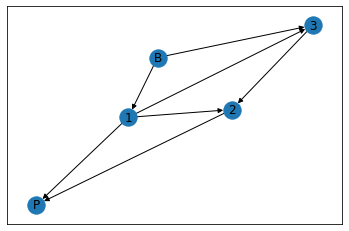

In [57]:
#Importeer de module networkx
import networkx as nx
#Importeer de module matplotlib.pyplot
import matplotlib.pyplot as plt

#Definieer een lege graaf
G = nx.DiGraph()

#Voeg één voor één de takken toe met hun capaciteit
G.add_edge('B',1, capacity=5)
G.add_edge('B',3,capacity=6)
G.add_edge(1,2,capacity=5)
G.add_edge(3,2,capacity=3)
G.add_edge(1,3,capacity=2)
G.add_edge(2,'P',capacity=5)
G.add_edge(1,'P',capacity=6)

#Teken het netwerk
nx.draw_networkx(G)
plt.show()

In [58]:
#Bepaal de maximale stroom door het netwerk van bron naar put
max_str,stromen = nx.maximum_flow(G,'B','P')

print('De maximale stroom door het netwerk bedraagt',max_str,'liter/minuut')

#Print voor alle takken in het netwerk de stroom
for e in G.edges():
    print('De stroom van',e[0],'naar',e[1],'bedraagt',stromen[e[0]][e[1]])

De maximale stroom door het netwerk bedraagt 8 liter/minuut
De stroom van B naar 1 bedraagt 5
De stroom van B naar 3 bedraagt 3
De stroom van 1 naar 2 bedraagt 0
De stroom van 1 naar 3 bedraagt 0
De stroom van 1 naar P bedraagt 5
De stroom van 3 naar 2 bedraagt 3
De stroom van 2 naar P bedraagt 3
